In [1]:
from IPython.display import display, HTML
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.metrics
import sklearn

In [2]:
labels_df = pd.read_csv('../stats/all-labels.csv')
display(labels_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake
0,9a22372d22a52397.mp4,1,1.0,1.0,0,1
1,9bc4f1306bb8e2cd.mp4,1,1.0,1.0,0,1
2,88fe2a902a9d8cc7.mp4,1,1.0,1.0,0,1
3,1f3cbda142d0944a.mp4,1,1.0,1.0,0,1
4,63bed62257daccaf.mp4,1,1.0,1.0,0,1
...,...,...,...,...,...,...
6938,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0
6939,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0
6940,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0
6941,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0


In [33]:
joon_preds = pd.read_csv('../stats/sync-vid-preds-211115-2044.csv')
joon_preds = joon_preds.groupby('filename', sort=False, as_index=False).agg(min)
joon_preds = pd.merge(
    left=labels_df, right=joon_preds, 
    left_on='filename', right_on='filename'
)

joon_preds['diff'] = joon_preds['mean_pred'] - joon_preds['median_pred']
display(joon_preds)

,filename,label,audio_fake,face_fake,swap_fake,both_fake,mean_pred,median_pred,1st_quartile_pred,3rd_quartile_pred,face_no,diff
0,18351609de111566.mp4,1,0.0,0.0,1,0,12.825241,13.171495,9.604192,14.841698,0,-0.346254
1,5026338ed12800bc.mp4,1,0.0,0.0,1,0,12.226965,12.586184,9.006733,14.791941,0,-0.359219
2,5968740ef3396f0c.mp4,1,0.0,0.0,1,0,12.619064,12.806955,9.320196,14.131991,0,-0.187891
3,50e301013618719d.mp4,1,0.0,0.0,1,0,13.723406,13.448393,11.882830,15.546733,0,0.275013
4,bc6dd15cfdfe6175.mp4,1,0.0,0.0,1,0,13.020068,12.643965,10.748637,15.424719,0,0.376103
...,...,...,...,...,...,...,...,...,...,...,...,...
394,951ee63325b9c303.mp4,0,0.0,0.0,0,0,12.421661,13.052989,9.590781,15.430199,0,-0.631328
395,2ffa046041106046.mp4,0,0.0,0.0,0,0,11.785560,11.611810,9.470455,13.838875,0,0.173750
396,2810f7be925ccbfc.mp4,0,0.0,0.0,0,0,14.275546,14.084501,11.742726,17.004413,0,0.191045
397,8dbb4de72c27723a.mp4,0,0.0,0.0,0,0,10.553819,9.647387,8.541011,13.345322,0,0.906432


In [37]:
X = joon_preds[['mean_pred', 'median_pred', '1st_quartile_pred', '3rd_quartile_pred']]
X = X.to_numpy()
Y = joon_preds['label'].to_numpy(dtype=float)
X
print(Y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

[0.64021828 0.4181776  0.57353748 0.76953641 0.55834542 0.60157842
 0.55010914 0.52839153 0.42785916 0.61204236 0.9063277  0.59662108
 0.62860809 0.48493696 0.89054536 0.95216186 0.79849215 0.94399906
 0.94862869 0.57782431 0.38389741 0.60421004 0.82741096 0.68021132
 0.28921772 0.368403   0.25871064 0.74987903 0.50866313 0.32348803
 0.21483058 0.35596835 0.24219045 0.31229018 0.47343609 0.46882559
 0.47685639 0.59098134 0.28512039 0.75546834 0.81685409 0.84142579
 0.87905257 0.92696178 0.90495021 0.6651877  0.71797288 0.62097497
 0.60217938 0.24849766 0.72102055 0.87133669 0.81320086 0.72628898
 0.41228526 0.76107643 0.80130822 0.7897338  0.77688223 0.84494019
 0.75108819 0.74198366 0.62446114 0.68578809 0.73438966 0.63282091
 0.72904964 0.90332885 0.82720821 0.89725672 0.79445741 0.77051965
 0.56520163 0.84802101 0.83309065 0.78450532 0.7200704  0.85808805
 0.77827404 0.78341863 0.91904795 0.83757516 0.8641721  0.88198482
 0.90442941 0.62732587 0.79625567 0.76373438 0.66700105 0.6650

(array([ 4.,  8.,  6.,  4.,  5.,  8.,  9., 12.,  9.,  4.,  6.,  9., 10.,
         2., 11.,  6.,  6., 11., 10.,  8., 10.,  8.,  5., 14.,  9.,  4.,
         8.,  7.,  9.,  6., 10., 10., 14.,  8., 11.,  5.,  5.,  8.,  7.,
        14., 16., 15.,  4.,  5.,  9.,  5.,  7.,  7.,  7.,  4.]),
 array([0.02035764, 0.03899372, 0.05762981, 0.07626589, 0.09490198,
        0.11353806, 0.13217415, 0.15081023, 0.16944631, 0.1880824 ,
        0.20671848, 0.22535457, 0.24399065, 0.26262674, 0.28126282,
        0.29989891, 0.31853499, 0.33717108, 0.35580716, 0.37444324,
        0.39307933, 0.41171541, 0.4303515 , 0.44898758, 0.46762367,
        0.48625975, 0.50489584, 0.52353192, 0.542168  , 0.56080409,
        0.57944017, 0.59807626, 0.61671234, 0.63534843, 0.65398451,
        0.6726206 , 0.69125668, 0.70989277, 0.72852885, 0.74716493,
        0.76580102, 0.7844371 , 0.80307319, 0.82170927, 0.84034536,
        0.85898144, 0.87761753, 0.89625361, 0.9148897 , 0.93352578,
        0.95216186]),
 <BarContainer

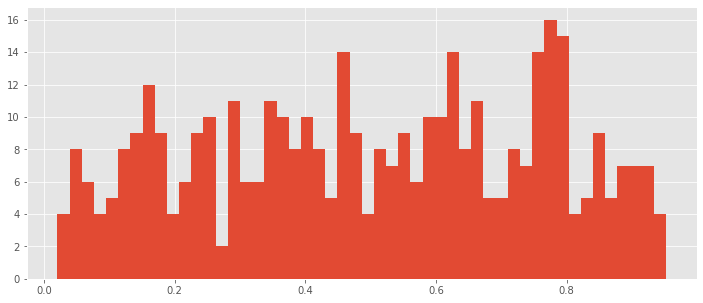

In [38]:
clf = LogisticRegression(random_state=42, multi_class='ovr').fit(X[130:], Y[130:])
y_pred = clf.predict_proba(X)[:, 1]
print(train_preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.hist(train_preds, bins=50)

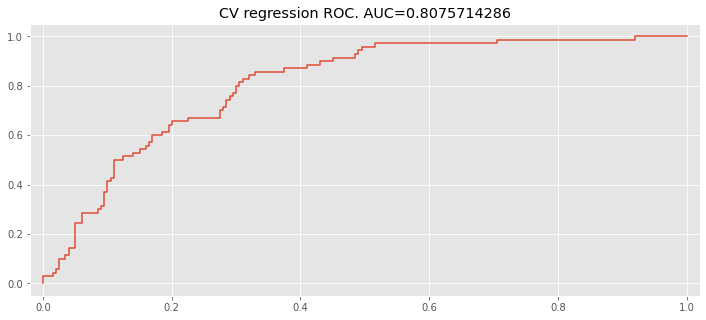

In [51]:
clip = -270
fpr, tpr, _ = sklearn.metrics.roc_curve(Y[clip:], y_pred[clip:])
auc = sklearn.metrics.roc_auc_score(Y[clip:], y_pred[clip:])

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("CV regression ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)